In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2')

import csv
import statistics
import matplotlib.pyplot as plt; plt.rcdefaults()

In [10]:
x = tokenizer.tokenize('here we go again')

In [11]:
x

['here', 'we', 'go', 'again']

In [12]:
def get_stats(name):
    len_tokens = []
    with open("epi_classify_"+name+".tsv", 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        next(reader)
        for i, row in enumerate(reader):
            try:
                abstract = row[0]
                len_tokens.append(len(tokenizer.tokenize(abstract)))
            except:
                print(i)
    csvfile.close()

    print('max: ',max(len_tokens))
    print('min: ',min(len_tokens))
    print('mean: ',statistics.mean(len_tokens))
    print('standard deviation: ',statistics.stdev(len_tokens))
    print('median: ',statistics.median(len_tokens))
    
    fig = plt.figure()
    plt.ylabel('# of Abstracts')
    plt.xlabel('# of Tokens')
    plt.hist(len_tokens)

    plt.show()

    Cutoff = statistics.mean(len_tokens)+2*statistics.stdev(len_tokens)
    #Find out what is a good cutoff that gets ~95% of all abstracts
    print('% covered fully by cutoff: ',len([x for x in len_tokens if x<=Cutoff])/len(len_tokens))
    print('cutoff: ',Cutoff)

train
max:  1729
min:  17
mean:  309.2497863856451
standard deviation:  133.46291564177676
median:  306.0


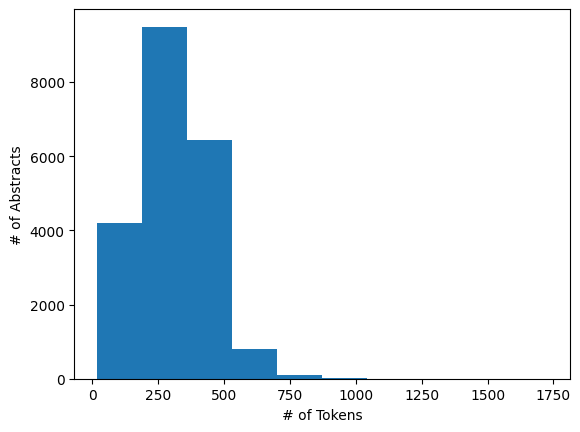

% covered fully by cutoff:  0.9732744707110984
cutoff:  576.1756176691986
--------------------------------------------------------------------------------------------------

val
max:  1355
min:  20
mean:  304.4562369470287
standard deviation:  131.29680447912364
median:  303


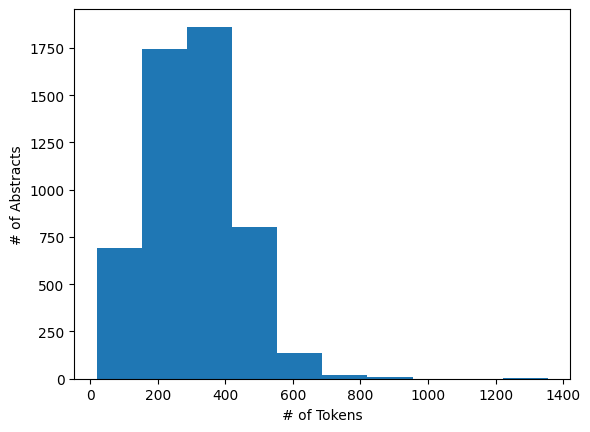

% covered fully by cutoff:  0.9722802354281375
cutoff:  567.049845905276
--------------------------------------------------------------------------------------------------

test
max:  754
min:  58
mean:  340.90909090909093
standard deviation:  149.25639431207853
median:  356


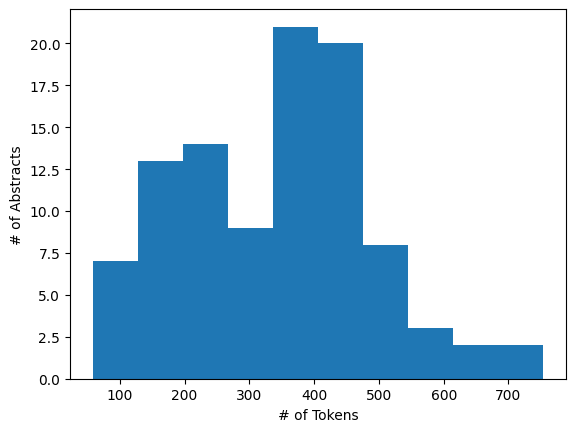

% covered fully by cutoff:  0.9595959595959596
cutoff:  639.421879533248
--------------------------------------------------------------------------------------------------



In [13]:
for name in ['train','val','test']:
    print(name)
    get_stats(name)
    print('--------------------------------------------------------------------------------------------------\n')

Get Frequency Distribution to see if commonly used words can be removed

In [2]:
abstracts = []
with open("epi_classify_train.tsv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
            abstracts.append(row[0])
    csvfile.close()
print(len(abstracts))

with open("epi_classify_val.tsv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
            abstracts.append(row[0])
    csvfile.close()
print(len(abstracts))

with open("epi_classify_test.tsv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader)
    for row in reader:
            abstracts.append(row[0])
    csvfile.close()
print(len(abstracts))

21066
26333
26432


In [3]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
fdist = FreqDist()
for abstract in abstracts:
    for word in word_tokenize(abstract):
        fdist[word.lower()] += 1

In [4]:
fdist

FreqDist({',': 247509, '.': 229573, 'the': 224863, 'of': 199835, 'and': 179804, 'in': 133159, 'a': 99567, ')': 91249, '(': 90917, 'with': 84281, ...})

In [5]:
print(fdist)

<FreqDist with 121431 samples and 5619851 outcomes>


In [6]:
fdist.plot()

/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wzkariampuzha/.local/lib/python3.6/site-packages/matplotlib

KeyboardInterrupt: 

In [9]:
fdist.pprint(maxlen=50)

FreqDist({',': 247509, '.': 229573, 'the': 224863, 'of': 199835, 'and': 179804, 'in': 133159, 'a': 99567, ')': 91249, '(': 90917, 'with': 84281, 'to': 77743, 'is': 47468, 'was': 41302, 'for': 38659, ':': 37959, 'patients': 35876, 'were': 32703, 'by': 27629, 'we': 25946, 'that': 25895, 'this': 24990, 'as': 24172, '%': 22331, 'are': 20093, 'an': 18870, 'on': 18754, 'or': 17857, 'be': 16893, 'from': 16806, 'syndrome': 16709, 'clinical': 16442, 'disease': 16042, 'at': 13847, 'patient': 12847, 'have': 12595, 'which': 11723, 'gene': 11588, 'diagnosis': 11499, 'case': 11449, 'mutations': 11335, 'cases': 11074, ';': 10902, 'results': 10604, 'study': 10565, 'these': 10494, 'been': 10442, 'associated': 10385, 'treatment': 10233, 'genetic': 10233, 'not': 9956, ...})


seems like no...

In [2]:
from datasets import list_metrics
metrics_list = list_metrics()
print(len(metrics_list))
print(', '.join([metric for metric in metrics_list]))

33
accuracy, bertscore, bleu, bleurt, cer, chrf, code_eval, comet, competition_math, coval, cuad, f1, gleu, glue, google_bleu, indic_glue, matthews_correlation, meteor, pearsonr, precision, recall, rouge, sacrebleu, sari, seqeval, spearmanr, squad, squad_v2, super_glue, ter, wer, wiki_split, xnli
